In [28]:
from __future__ import print_function
import torch
import numpy as np

# Tensor Additions

In [29]:
print("uninitialize torch tensor")
x = torch.Tensor(5,3)
print(x)

# random matrx
print("random torch matrix")
x = torch.rand(5, 3)
print(x)

# size
print("matrix size")
print(x.size())
print("")

#addition 
print("addition 1: x+y")
y = torch.rand(5,3)
print(x+y)
print("addition 2: torch.add(x,y)")
print(torch.add(x,y))
# specify output
print("addition 3: torch.add(x,y, out=result) (result is an uninitialize tensor)")
result = torch.Tensor(5,3)
torch.add(x,y, out=result)
print(result)
# add x to y 
print("addition 4: y.add(x) (store the sum to y)")
y.add_(x)
print(y)

print(x[:,1])

uninitialize torch tensor

 0.0000e+00  0.0000e+00 -3.5992e+12
 4.5827e-41 -3.6000e+12  4.5827e-41
 1.5290e-38  0.0000e+00  1.5290e-38
 0.0000e+00  7.6831e+31  4.7429e+30
 8.9683e-44  0.0000e+00 -4.1660e+18
[torch.FloatTensor of size 5x3]

random torch matrix

 0.7810  0.7466  0.6949
 0.4307  0.0733  0.7818
 0.1308  0.3359  0.5869
 0.0680  0.4492  0.4131
 0.3627  0.4599  0.3691
[torch.FloatTensor of size 5x3]

matrix size
torch.Size([5, 3])

addition 1: x+y

 1.6034  1.7391  0.7005
 0.7543  0.6738  1.1187
 1.0553  0.9239  0.6755
 1.0298  1.2310  0.6075
 0.8298  1.3627  0.8712
[torch.FloatTensor of size 5x3]

addition 2: torch.add(x,y)

 1.6034  1.7391  0.7005
 0.7543  0.6738  1.1187
 1.0553  0.9239  0.6755
 1.0298  1.2310  0.6075
 0.8298  1.3627  0.8712
[torch.FloatTensor of size 5x3]

addition 3: torch.add(x,y, out=result) (result is an uninitialize tensor)

 1.6034  1.7391  0.7005
 0.7543  0.6738  1.1187
 1.0553  0.9239  0.6755
 1.0298  1.2310  0.6075
 0.8298  1.3627  0.8712
[torch.F

# Numpy Functionality

In [30]:
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)

a.add_(1)
print(a)
print(b)



 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

[ 1.  1.  1.  1.  1.]

 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [31]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)


[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



# Cuda

In [32]:
#cuda
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    print(x+y)


 2.3844  2.4857  1.3953
 1.1850  0.7471  1.9004
 1.1861  1.2598  1.2624
 1.0977  1.6802  1.0206
 1.1924  1.8226  1.2403
[torch.cuda.FloatTensor of size 5x3 (GPU 0)]



# Autograd

define variable and automatically finds the gradient

In [33]:
from torch.autograd import Variable

In [34]:
x = Variable(torch.ones(2,2), requires_grad=True)
print(x)

y = x + 2
print(y)
# prints the operation that creates y
print(y.grad_fn)

z = y * y * 3
print(z)
out = z.mean()

print(z)
print()
print(out)
print(out.grad_fn)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]


Variable containing:
 27
[torch.FloatTensor of size 1]



In [35]:
out.backward() # compute gradient wrt the output

In [36]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



# More examples

In [37]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x*2
print(y.data.norm())
while y.data.norm() < 1000:
    y = y * 2
print(y)

5.629244205011689
Variable containing:
  828.0681
-1147.2659
  273.5225
[torch.FloatTensor of size 3]



In [38]:
gradients = torch.FloatTensor([0.1,1.0,0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  51.2000
 512.0000
   0.0512
[torch.FloatTensor of size 3]



# Network

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        # max pooling a 2x2 window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # if the window size is q square, one number is enough
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:] # all diensions except the batch dimension
        num_features = 1 
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [13]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

net.zero_grad()
out.backward(torch.randn(1,10))

10
torch.Size([6, 1, 5, 5])
Variable containing:
-0.0562 -0.0331 -0.0337  0.0223 -0.0756 -0.1671  0.0661 -0.1256 -0.0234 -0.0639
[torch.FloatTensor of size 1x10]



In [14]:
#Loss
output = net(input)
target = Variable(torch.arange(1,11))
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 39.0878
[torch.FloatTensor of size 1]



In [15]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [16]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
-0.1336
 0.1497
 0.1326
-0.0843
-0.1437
 0.1469
[torch.FloatTensor of size 6]



In [17]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [18]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=learning_rate)
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

# Datasets and DataLoader

In [19]:
import torchvision
import torchvision.transforms as transforms

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

  cat  bird   car   car


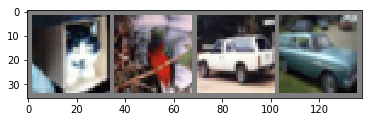

Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yi/.virtualenvs/py3/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 35, in _worker_loop
    r = index_queue.get()
  File "/home/yi/.virtualenvs/py3/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 35, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, i

In [22]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [23]:
# define CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 12, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(12, 32, 5)
        self.fc1 = nn.Linear(32*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
net.cuda()


Net (
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(12, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (800 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [24]:
# optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [25]:
# training 
net.train()
for epoch in range(2):
    running_loss = 0.0
    for i, (data, target) in enumerate(trainloader,0):
        inputs, labels = data.cuda(), target.cuda()
        
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d, %5d] loss : %.3f' %
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print("Finished")

[1,  2000] loss : 2.222
[1,  4000] loss : 1.835
[1,  6000] loss : 1.652
[1,  8000] loss : 1.545


Process Process-4:
Process Process-3:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yi/.virtualenvs/py3/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 35, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yi/.virtualenvs/py3/lib/python3.5/site-packages/torch/utils/data/dataloader

KeyboardInterrupt: 

GroundTruth:    cat  ship  ship plane


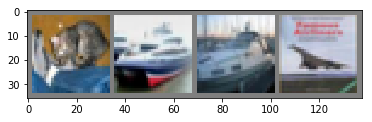

In [53]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [54]:
outputs = net(Variable(images.cuda()))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [56]:
correct = 0
total = 0
for (data, target) in testloader:
    images, labels = data.cuda(), target.cuda()
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


In [66]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data,target in testloader:
    images, labels = data.cuda(), target.cuda()
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    class_accuracy = 100 * class_correct[i] / class_total[i]
    class_accuracys += class_accuracy
    print('Accuracy of %5s : %2d %%' %(
        classes[i], class_accuracy))


Accuracy of plane : 60 %
Accuracy of   car : 75 %
Accuracy of  bird : 40 %
Accuracy of   cat : 42 %
Accuracy of  deer : 54 %
Accuracy of   dog : 55 %
Accuracy of  frog : 66 %
Accuracy of horse : 76 %
Accuracy of  ship : 75 %
Accuracy of truck : 66 %
